# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings 
# Ignore FutureWarning
warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [2]:
# Set path
path = r'C:\Users\gered\OneDrive\Desktop\Boat Sales 01.24.A6\Boat Sales 23.01.24'

In [3]:
# Import Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boats_clustered.csv'), index_col = False)

In [4]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,UsageType,Year Built,Material,Last 7 days views,Country,Price in EUR,Size,Price category
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,none,226,Switzerland,3537,7.600,Low price
1,1,Center console boat,Terhi power boats,new boat from stock,2020,Thermoplastic,75,Germany,3490,6.000,Low price
2,2,Sport Boat,Pioner power boats,new boat from stock,2020,none,64,Denmark,3367,3.000,Low price
3,3,Fishing Boat,Linder power boats,new boat from stock,2019,Aluminium,58,Germany,3399,5.183,Low price
4,4,Catamaran,none,"Used boat,Unleaded",1999,Aluminium,474,Switzerland,3816,14.756,Low price


In [5]:
# Select variables of interest
Var_sel = ['Year Built','Last 7 days views']

# Create a new DataFrame with only the selected variables
time_df = df[Var_sel]

# Display the new DataFrame
time_df.head()

,Year Built,Last 7 days views
0,2017,226
1,2020,75
2,2020,64
3,2019,58
4,1999,474


In [6]:
# Set "Year Built" as the index
time_df = time_df.set_index('Year Built')

# Display the new DataFrame
time_df.head()

,Last 7 days views
Year Built,
2017,226
2020,75
2020,64
2019,58
1999,474


In [7]:
from datetime import datetime

time_df.index = pd.to_datetime(time_df.index, format='%Y')  # Convert the index to datetime format
time_df.index.name = 'Year Built'  # Set the name of the datetime index
time_df.head()

,Last 7 days views
Year Built,
2017-01-01,226
2020-01-01,75
2020-01-01,64
2019-01-01,58
1999-01-01,474


In [8]:
type(time_df)

pandas.core.frame.DataFrame

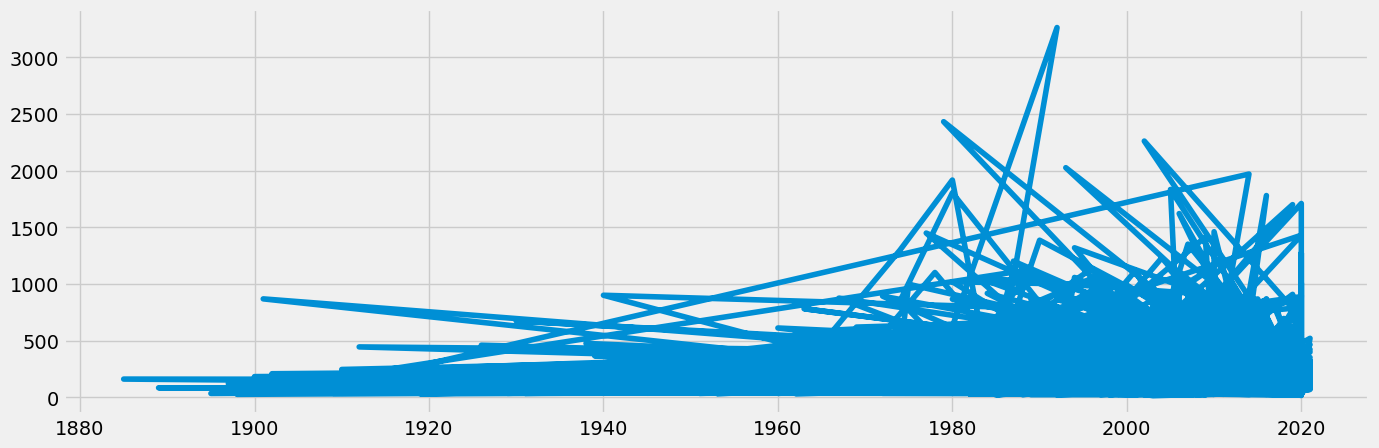

In [9]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(time_df)

In [10]:
# Check for missing values (you shouldn't have any)

time_df.isnull().sum() 

Last 7 days views    0
dtype: int64

### 3. Time-series analysis: decomposition

In [11]:
period = 1  # Specify the period (assuming yearly data)

# Infer the frequency from the existing datetime index
time_df.index.freq = pd.infer_freq(time_df.index)

# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(time_df['Last 7 days views'], model='additive', period=period)


In [12]:
# Access the decomposed components (trend, seasonal, residual)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [13]:
from pylab import rcParams 

# This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

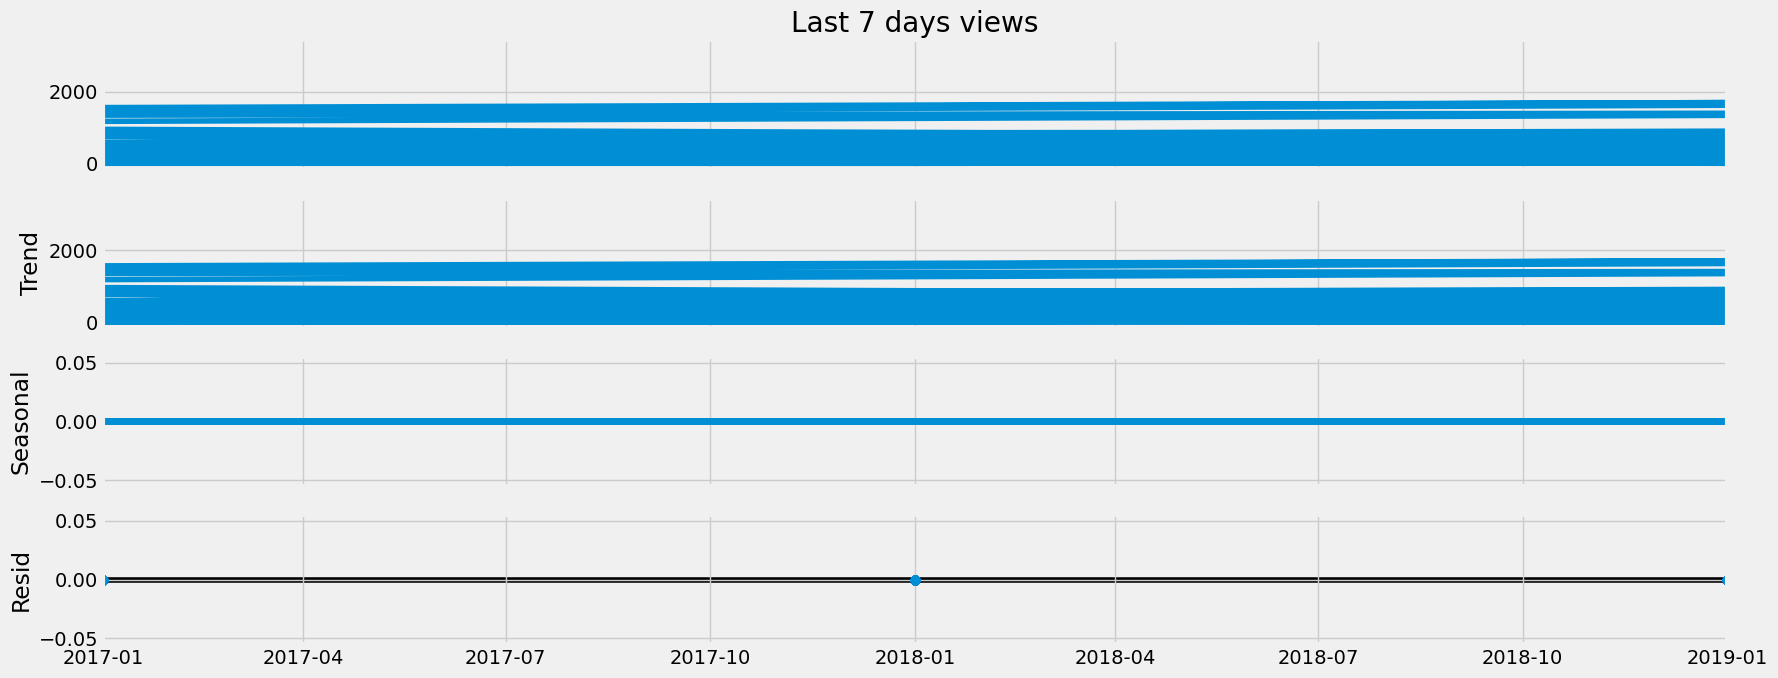

In [14]:
# Plot the separate components

decomposition.plot()
plt.show()

###### The trend component appears as a horizontal line, it suggests that there is no clear upward or downward trend, and horizontal line for the seasonal component suggests that the seasonal variation is consistent across the entire time series, without significant fluctuations

### 4. Testing for stationarity

In [15]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller

# Define the function
def dickey_fuller(timeseries):
    # Perform the Dickey-Fuller test:
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

# Apply the test using the function on the time series
dickey_fuller(time_df['Last 7 days views'])


Dickey-Fuller Stationarity test:
Test Statistic                -8.778694e+00
p-value                        2.409420e-14
Number of Lags Used            3.500000e+01
Number of Observations Used    9.173000e+03
Critical Value (1%)           -3.431063e+00
Critical Value (5%)           -2.861855e+00
Critical Value (10%)          -2.566938e+00
dtype: float64


##### The low p-value and the test statistic being lower than the critical values suggest that I can reject the null hypothesis, indicating that the 'Last 7 days views' time series is likely stationary.

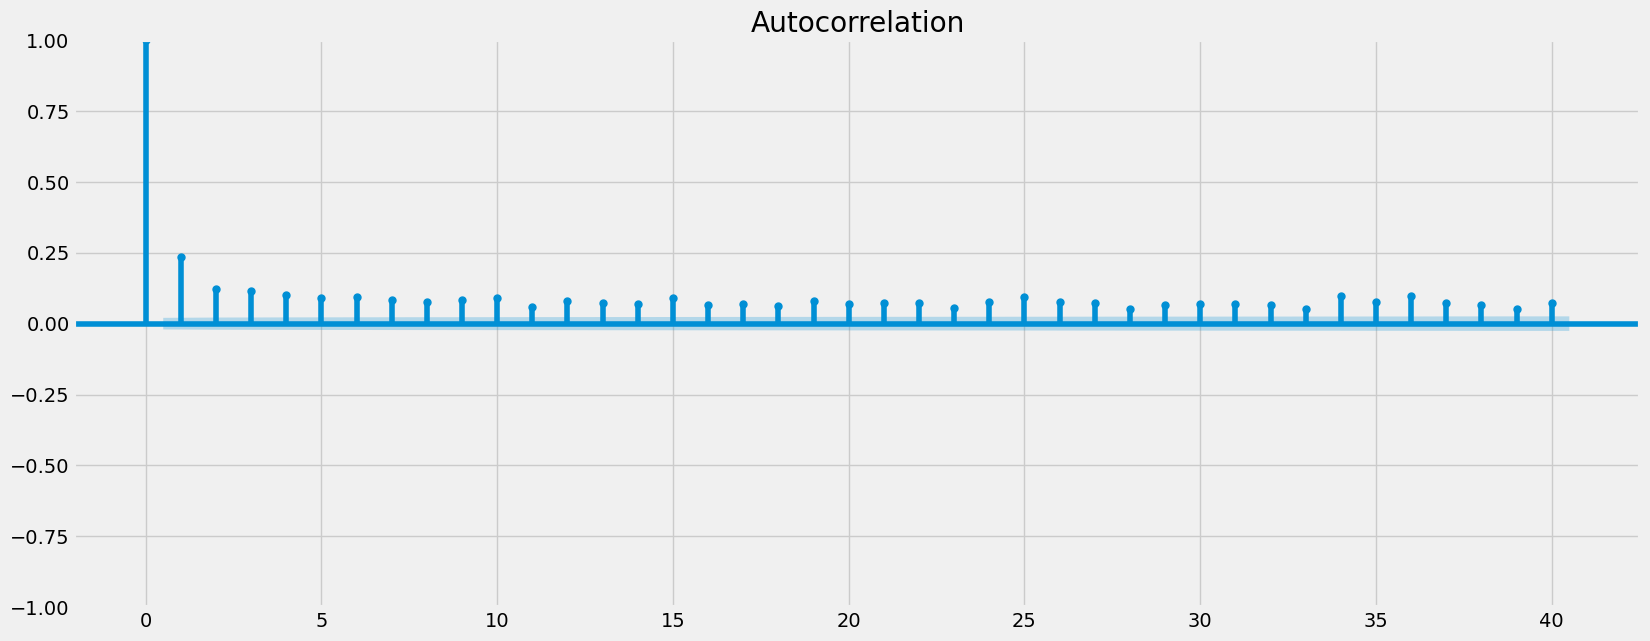

In [16]:
# import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

# Check out a plot of autocorrelations
plot_acf(time_df)
plt.show()

##### Do not provide meaningful insights, it might indicate that the data doesn't exhibit strong trends or seasonality. 